<a href="https://colab.research.google.com/github/CODSOFT-DS/Task-3/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as Pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [3]:
df = Pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['species'], categories = Pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


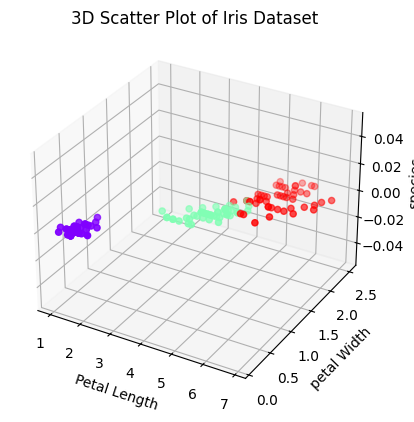

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length, df.petal_width, c=df.species, cmap='rainbow')
ax.set_xlabel('Petal Length')
ax.set_ylabel('petal Width')
ax.set_zlabel('species')
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()

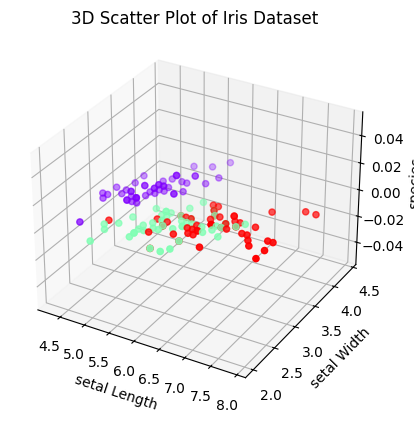

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sepal_length, df.sepal_width, c=df.species, cmap='rainbow')
ax.set_xlabel('setal Length')
ax.set_ylabel('setal Width')
ax.set_zlabel('species')
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

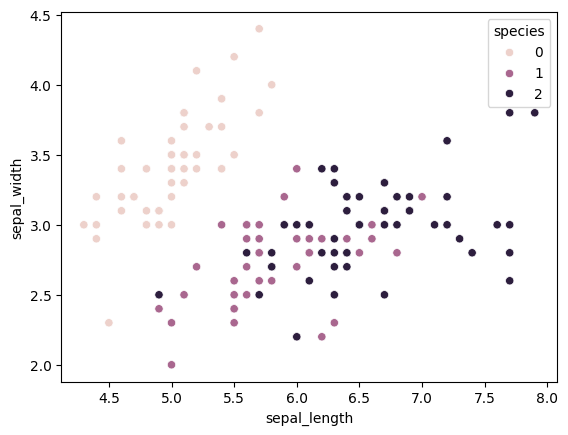

In [25]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

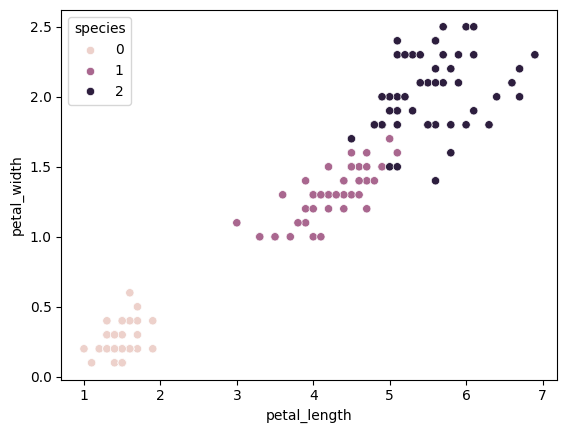

In [24]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [26]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length', 'petal_width']])

In [30]:
sse

[]

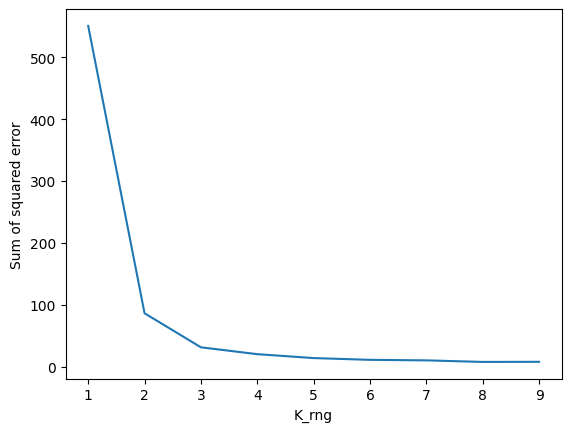

In [35]:
plt.xlabel('K_rng')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [36]:
km = KMeans(n_clusters=3, random_state=0)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [37]:
df['cluster'] = y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, y_predicted)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

Text(0.5, 0, 'Predicted Label')

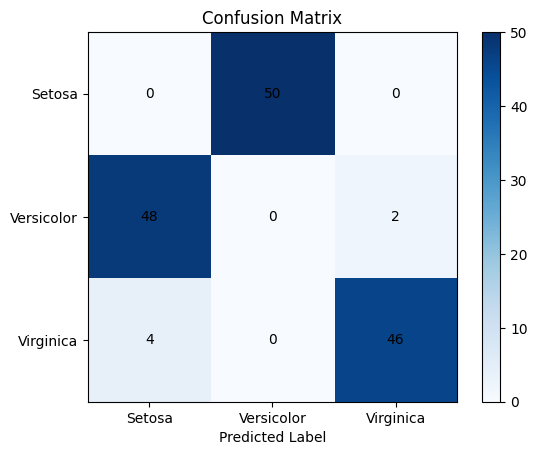

In [39]:
true_labels = df.species
predicted_labels = df.cluster
cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'Versicolor', 'Virginica']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), horizontalalignment='center', verticalalignment='center')

plt.xlabel('Predicted Label')

In [40]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train, x_test, y_train, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [42]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train) # Assign the result to X_train_scaled
x_test_scaled = scaler.transform(x_test) # Assign the result to x_test_scaled

X_train_scaled, x_test_scaled # Display the scaled data

(array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
        [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
        [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
        [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
        [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
        [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
        [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
        [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
        [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
        [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
        [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
        [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
        [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
        [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
        [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
        [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
        

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [47]:
y_predicted = knn.predict(x_test_scaled)
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [48]:
species_name = df['species'].unique().astype(str).tolist()

report = classification_report(y_test, y_predicted, target_names=species_name)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

